> Este material se basa el material de [Fundamentos_de_informatica](https://github.com/AJVelezRueda/Fundamentos_de_informatica/tree/master/Ciencia_de_datos/Analisis_datos_con_pandas.md)

### Introducción a la Ciencia de Datos con Python

Para este recorrido necesitarás las librerías [Pandas](https://pandas.pydata.org/), [Seaborn](https://seaborn.pydata.org/) y [Scipy](https://www.scipy.org/)


Podes corroborar si las tienes instaladas corriendo las siguientes líneas en tu intérprete de Python:

```python
import pandas as pd
import seaborn as sns
import scipy.stats as ss
```

Si correr estas lineas no tira ningún error, etonces están felizmente instaladas las bibliotecas enc uestión. De lo contrario, obtendremos un mensaje de error `ModuleNotFoundError: No module named` al correr las lineas anteriores. En tal caso, podés instalar las bibliotecas desde la consola, con el comando:

```bash
        pip install pandas
        pip install seaborn
        pip install scipy
```

En este recorrido trabajaremos sobre los datos abiertos del sobre el personal del [Ministerio de Ciencia y Tecnología](https://datasets.datos.mincyt.gob.ar/dataset/personal-de-ciencia-y-tecnologia/archivo/11dca5bb-9a5f-4da5-b040-28957126be18) del Gobierno Argentino. 

# Guias de Trabajo
  * [1. Introducción a Pandas](#1-pandas)
  * [2. Trabajando con DataFrames](#2-dfs)
  * [3. Métodos de los DataFrames](#3-metodos)
  * [4. Tratamiento de Datos con Python](#4-datos)

[1. Introducción a Pandas](#1-pandas) 

En este recorrido vamos a adentrarnos en el mundo de los datos, y para ello utilizaremos Pandas, una biblioteca de Python que nos permite trabajar con archivos de formato definido: CSV, un excel, etc. Además, Pandas proporciona estructuras de datos rápidas, flexibles y expresivas diseñadas para que trabajar con datos "relacionales" o "etiquetados" sea fácil e intuitivo. En criollo: Pandas es como en excel, pero super duper!

> Para pensar 🤔: Si hasta aquí no te has preguntado qué es una bliblioteca, ¡es momento de hacerse esa pregunta! ¿Para qué creés que nos puede resultar útil esta biblioteca? ¿Cuál es la ventaja de usar Pandas? ¿Por qué no solo usar Python `"de a pie"`?
>

Pandas soporta múltipes tipos de datos:

- Datos tabulares con columnas de tipo heterogéneo, como en una tabla SQL o en una hoja de cálculo de Excel
- Datos ordenados y desordenados (no necesariamente frecuencia fija).
- Datos matriciales arbitrarios (homogéneamente tipados o heterogéneos) con etiquetas de fila y columna
- Cualquier otra forma de conjuntos de datos observacionales/estadísticos. 

Los datos en realidad no necesitan ser etiquetados para ser colocados en una estructura de datos de pandas. Estas estructuras se construyen a partir de arrays(listas), pero agregando nuevas funcionalidades. Pandas maneja dos estructuras de datos: Series y DataFrames.

**Series (1-dimensional)**
Las series pueden contener cualquier tipo de datos (enteros, cadenas, números de punto flotante, etc.). Y se pueden crear del siguiente modo:

```python
import pandas as pd
una_serie = pd.Series(['Peru', 'Argentina', 'Bolivia', 'Uruguay', 'Brasil', 'Chile'], dtype='string')

print(una_serie)
```

**DataFrames (2-dimensional)**

Un DataFrame es una estructura tabular bidimensional de datos tabulares, potencialmente heterogéneos, con ejes etiquetados (filas y columnas). Las operaciones aritméticas se alinean en las etiquetas de fila y columna. Se puede considerar como un contenedor similar a un dict para objetos Serie. Podemos crear un DataFrame del sigueinte modo:

```python
paises_latam = pd.DataFrame(data ={"Pais": ['Peru', 'Argentina', 'Bolivia', 'Uruguay', 'Brasil', 'Chile'], "Lengua oficial primaria": ['Español', 'Español', 'Español', 'Español', 'Portugues', 'Español']}, index = [1,2,3,4,5,6])

print(paises_latam)
```

Por lo tanto, la serie es la estructura de datos para una sola columna de un DataFrame, no solo conceptualmente, sino literalmente, es decir, los datos en un DataFrame se almacenan realmente en la memoria como una colección de Series.

También, se puede crear un DataFrame a partir de un diccionario, en este caso las claves se corresponderán con los nombres de las columnas y los valores con los datos de las filas para cada columna:

```python
#será DataFrame(data=diccionario, index=filas, columns=columnas, dtype=tipos)
datos = {"Pais": ['Peru', 'Argentina', 'Bolivia', 'Uruguay', 'Brasil', 'Chile'], "Idioma oficial": ['Español', 'Español', 'Español', 'Español', 'Portugues', 'Español']}
paises_latam = pd.DataFrame(datos)

print(paises_latam)
```
🛑 Alerta: los valores asociados a las claves del diccionario deben ser listas del mismo tamaño

`df` es el nombre génerico para designar DataFrame y es el nombre que utilizaremos de ahora en más para mayor simplicidad.


Otra forma muy usual de generar DataFrames es mediante la lectura de **archivos estructurados**. Existen muchas formas de cargar/leer información desde archivos la información desde archivos pero en general la diferencia radica principalmente en los parámetros por defecto que toman para definir las columnas. Por ejemplo: 

- El caracter de separación de columnas por defecto del método `read_cvs` es una coma (',') 
- El caracter de separación de columnas por defecto del método `read_fwf` es una tab ('\t').

```python
import pandas as pd
df = pd.read_csv(path_al_archivo)
```

>  🧗‍♀️ Desafío I: Estos métodos aceptan otros parámetros que merecen la pena ser explorados. Averiguá para qué sirven los parámetro sep, index_col, nrows y header

>  🧗‍♀️ Desafío II: Descargá a tu computadora la [tabla](https://datasets.datos.mincyt.gob.ar/dataset/personal-de-ciencia-y-tecnologia/archivo/11dca5bb-9a5f-4da5-b040-28957126be18) de personas que conforman el Ministerio de Ciencia y Tecnología de Argentina, en formato csv.
>
> Cargá (lee) la tabla a un DataFrame de Pandas de nombre `personas` ¿Qué forma te lectura de archivos usarías? ¿Qué separación entre columnas posee el archivo? ¿Cómo te diste cuenta? 🤔
>

Ya tenemos nuestra tabla cargada, podeés hacer una previsualización de los datos haciendo:

```python
personas.head()
```
> Para pensar 🤔: ¿Cuántas filas se imprimen al hacer head? ¿Qué sucede si hacemos `personas.head(10)`? ¡Probalo!

[2. Trabajando con DataFrames](#2-dfs)

Ahora que aprendiste a cargar datos en una `"tabla"` de Pandas, podés averiguar la información general de tu tabla haciendo: 

```python
personas.info()
```

Si bien esta información nos ayuda a saber los nombres de las columnas de nuestra tabla, o el tipo de datos que contiene cada una de ellas, quizás una descripción más informativa podría ser:

```python
personas.describe()
```
> Para pensar 🤔: ¿Qué tipo de información nos brinda el método describe? ¿Tienen sentido estos cálculos para todas las columnas?
>

Podemos acceder a los datos de cada columna haciendo df['nombre de la columna'], en nuestro caso por ejemplo:

``` python
personas[' persona_id']
```

> Para pensar 🤔: ¿Podés imprimir la columna de los `max_dedicacion_horaria_docente_id` de nuestra tabla? ¿Cómo calcularías el promedio de esta columna?

Quizás nos resulte útil acceder, no a todos los datos de una columna, sino a un dato de una celda en particular. Para ello podemos utilizar _iloc_:

```python
df.loc[fila, columna] 
```
esto devuelve el elemento que se encuentra en la fila con nombre fila y la columna de con nombre columna del DataFrame df. Probá el siguiente código:

```python
personas.loc[2, 'persona_id']
```

> Para pensar 🤔: ¿Qué resultado obtuviste? ¿Por qué? ¿Cómo obtendrías la edad de esa persona?

Podemos acceder los datos de una columna del DataFrame como una lista mediante el método _tolist()_:

``` python
df['columna'].tolist()
```

>  🧗‍♀️ Desafío IV: Extrae la columna `seniority_level` y contá cuántas personas tenían expertice nivel B, C y D

Seguramente tu resulación del _Desafío IV_ implicó hacer un _bucle for_ y un if, lo cual parece a priori un tanto engorroso. Para evitarnos tantas lineas de código, podemos hacer uso de los métodos _groupby()_ y _count()_, que nos permiten contar sobre una columna la frecuencia de un dato/evento en particular. Ejecutá las siguientes lineas a ver qué pasa:

```python
personas["seniority_level"].count()

personas.groupby("seniority_level").count()

personas.groupby("seniority_level")[["persona_id"]].count()
```

> 🧗‍♀️ Desafío V: ¿Qué resultados obtuviste en cada caso? Explicá qué hace cada linea de código

Podemos operar con las columnas con los mismo operadores relacionales y matemáticos que ya hemos visto:

``` python
personas['edad'] * 2
personas['edad'] + 2
personas['edad'] > 2  
```          
> Para pensar 🤔: ¿Qué resultado nos daría en cada caso? 

Pero los operadores tambien nos sirven también para filtrar nuestro DataFrame:

``` python
personas[personas['edad'] < 35 ]
```         

> 🧗‍♀️ Desafío V: Contá cuántas personas de 30 años ingresaron al ministerio en 2011 ¿Cuántas formas de hacer este cálculo se te ocurren?

Ahora vamos a ver cómo podemos incorporar más información a nuestro DataFrame. En la página del ministerio podés encontrar las tablas que pueblas la tabla general...veamos por ejemplo la tabla de [categoría de conicet](https://datasets.datos.mincyt.gob.ar/dataset/personal-de-ciencia-y-tecnologia/archivo/c72c9f88-d9ef-4349-bb20-5c9a1aca5d67)

> 🧗‍♀️ Desafío VI: Descargala en formato csv y cargala en un nuevo DataFrame de nombre `categorias`
> 🧗‍♀️ Desafío VII: Identificá si existen columnas en común con el DataFrame grande

Supongamos que ahora queremos poder realizar análisis de nuestros datos filtrando por categoria de conicet, en este caso podemos combinar las dos tablas, de modo de saber qué valos de `categoria_conicet_id` se corresponde con cada categoria de conicet. Probemos haciendo:

``` python
personas_cat = pd.merge(personas, categorias, on='categoria_conicet_id')
```

> Para pensar 🤔: ¿Qué datos tiene df3? ¿Qué hace el método merge? 

Probemos ahora el método _concat()_:
``` python
personas_cat = pd.conact([personas, categorias])
```
> Para pensar 🤔: ¿Qué datos tiene df3? ¿Qué hace el método _concat()_ y qué diferencia tiene con hacer _merge()_? 

[3. Métodos de los DataFrames](#3-metodos)

Veamos un resumen de los métodos que podés encontrar en Pandas para trabajar con DataFrames: 

| Lectura/carga de datos | Limpieza de los datos | Estdistica de los datos |
|-------------	|----------	|---	|
| pd.read_csv() | pd.head() | pd.describe() |
| pd.read_table() | pd.fillna() |df.sample()|
| pd.read_excel() | pd.dropna() | pd.mean() |
| pd.read_sql() | pd.sort_values() | pd.median() |
| pd.read_json() | pd.groupby() | pd.std() |
| pd.to_csv() |pd.apply() | pd.min() |
| pd.DataFrame() | pd.append() | pd.max() |
| pd.concat() | pd.rename()  | pd.count() |
| pd.Series() | pd.set_index() | pd.corr() |
| pd.DataFrame.from_dict() |  pd.tail() | pd.hist() |


>
>  🧗‍♀️ Desafío III: averiguá para qué sirve cada uno de los métodos y qué parámetros podés pasarseles. ¡Esta información nos será útil para más adelante!
>

Ahora que conocemos algunas de los métodos que nos permiten trabajar con DataFrames, veamos cómo [trabajar los datos](https://github.com/flbulgarelli/recursos-python/blob/master/2_Ciencia_de_datos_pandas/Analisis_de_datos_con_pandas.md) 🤓

<div class="tenor-gif-embed" data-postid="4794399" data-share-method="host" data-aspect-ratio="2.35849" data-width="100%"><a href="https://tenor.com/view/break-breaktime-cloudy-with-a-chance-of-meatballs-coffee-gif-4794399">Engage Coffee Break! GIF


<img src="tenor.gif">


In [3]:
# Open source data analysis and manipulation tool.
import pandas as pd

# Python data visualization library.
import seaborn as sns

#It provides numerical routines for numerical integration, interpolation, optimization, linear algebra, and statistics.
import scipy.stats as ss
%pylab inline

Populating the interactive namespace from numpy and matplotlib


##### [Análisis estadísticos con Scipy](https://docs.scipy.org/doc/scipy/reference/stats.html)
##### [Visualización de datos con Seaborn](https://seaborn.pydata.org/)

### MUESTRA Y POBLACIÓN

In [3]:
import random
from collections import Counter
rolled = []
repeat = 0
tiros = 100
while repeat < tiros:
    dices = random.randint(1,6)
    rolled.append(dices)
    repeat = repeat +1
d = dict(Counter(rolled))
for k, v in d.items():
    pct = v * 100.0 / tiros
    print(k, pct)

2 23.0
4 13.0
5 27.0
6 13.0
1 14.0
3 10.0


>***Población. Es el conjunto de personas u objetos de los que se desea conocer algo en una investigación.***
>
>***Muestra. Es un subconjunto o parte del universo o población en que se llevará a cabo la investigación. Hay procedimientos para obtener la cantidad de los componentes de la muestra como fórmulas, lógica y otros que se vera más adelante. La muestra es una parte representativa de la población.***

### <font color='red'>*¿Qué buscamos? ¿Cuál es nuestra hipótesis?*</font>

***Los datos que buscamos, los atributos que medimos o recolectamos y las comparaciones que hagamos dependen en primera instancia de aquello que perseguimos***

In [42]:
df = pd.read_csv('Tabla_estadistica.csv', sep=';', header=0)
del df['Numero']

In [5]:
df.head()

,Fecha,Sexo,Poblacion,AdenoV,RSV,INFA,INFB,PIV1,PIV2,PIV3,Edad(meses)
0,03/01/11,F,CABA,-,-,-,-,-,-,-,96.0
1,03/01/11,F,LA FERRERE,-,-,-,-,-,-,-,4.0
2,03/01/11,M,VILLA CELINA,-,-,-,-,-,-,-,8.0
3,03/01/11,M,VILLA CELINA,-,-,-,-,-,-,-,8.0
4,03/01/11,F,NaN,-,-,-,-,-,-,-,9.0


In [10]:
df.describe()

,Edad(meses)
count,6730.000000
mean,17.806300
std,92.370807
min,0.000000
25%,2.000000
50%,6.000000
75%,13.000000
max,6120.000000


### ¿Qué hacemos si faltan valores para algunos atributos?

*Ante la falta de valores tenemos tres opciones:*

   *- Eliminamos cada suceso que tenga al menos un valor faltante.*
    
   *- Reemplazamos los valores faltantes por el valor más frecuente
      si el atributo es categórico o por el promedio si es numérico.*
      
   *-Eliminar los atributos con datos faltantes.*
      
*¿Qué harían ustedes?*

In [43]:
df = df.dropna()

In [44]:
len(df)

4596

### <font color='red'>¿Qué nos dicen los datos?¿Tienen sentido?<font>

***Hay datos que se alejan del comportamiento estándar y para eso que tenemos conocer las razones***

***-Errores al cargar los datos***

***-Valores erráticos (Outliers)***

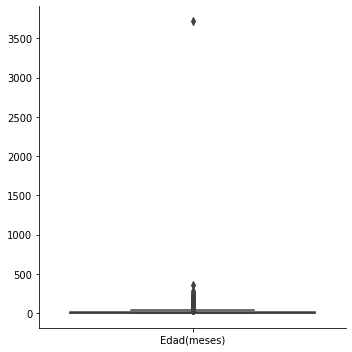

In [45]:
sns.catplot(x=None, y=None, kind="box", data=df)

***Criterio IQR para el tratamiento de outliers***

In [46]:
Q1 = df['Edad(meses)'].quantile(0.02)
Q3 = df['Edad(meses)'].quantile(0.98)
IQR = Q3 - Q1
idx = ~((df['Edad(meses)'] < (Q1 - 1.5 * IQR)) | (df['Edad(meses)'] > (Q3 + 1.5 * IQR)))

In [47]:
df1 = df[idx.values]

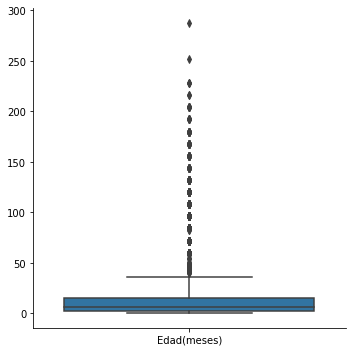

In [48]:
#Volvemos a graficar
sns.catplot(x=None, y=None, kind="box", data=df1)

**Criterio de z-score para el tratamiento de outliers**

In [49]:
# Test de outliers

'''Este test me devuelve las posiciones que tiene un z-score por encima del valor de referencia;
es decir, las posiciones de los datos outliers'''

#Calcula el estadístico del test
z = np.abs(ss.zscore(df['Edad(meses)']))

#Muestra las posiciones donde están los outliers
threshold = 3
print(np.where(z > threshold))

(array([  84,  243,  328, 1438, 2115, 3212, 3345, 3640, 3706]),)


In [50]:
# Elimino outliers

df_no_outliers = df[(z < threshold)]

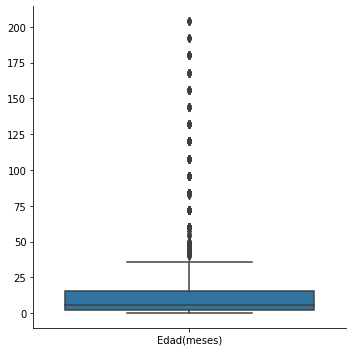

In [51]:
#Volvemos a graficar
sns.catplot(x=None, y=None, kind="box", data= df_no_outliers)

### ¿Qué se puede decir de las edades?

##### Cálculo de frecuencias

In [52]:
cumfreq = ss.cumfreq(df['Edad(meses)'], numbins=10, defaultreallimits=None, weights=None)
relfreq = ss.relfreq(df['Edad(meses)'], numbins=10, defaultreallimits=None, weights=None)

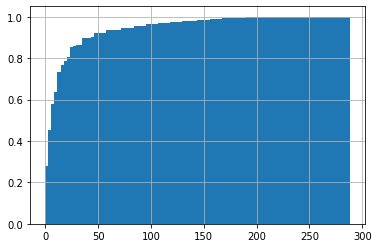

In [53]:
# Cumulative counts:
df1['Edad(meses)'].hist(cumulative=True, density=1, bins=100)
plt.show()

Text(0, 0.5, 'Frequency')

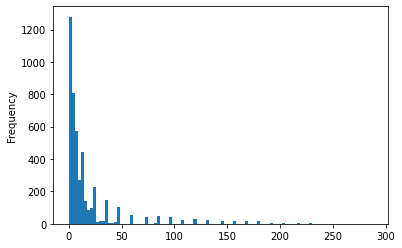

In [54]:
#Graficamos la distribuicón de los datos: histograma
%matplotlib inline
x = df1['Edad(meses)']
plt.hist(x, bins=100)
plt.ylabel('Frequency')

**¿Qué conclusiones podemos sacar?**

In [55]:
# Test de distribución

print(ss.normaltest(df1['Edad(meses)'], axis=0, nan_policy='propagate'))
print(ss.shapiro(df1['Edad(meses)']))

NormaltestResult(statistic=3395.494093628281, pvalue=0.0)
ShapiroResult(statistic=0.5396159887313843, pvalue=0.0)


**¿Qué podemos decir de esto?**

# Manejo de datos cualitativos

**Graficamos el número de casos de cada grupo**

/home/leandro/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


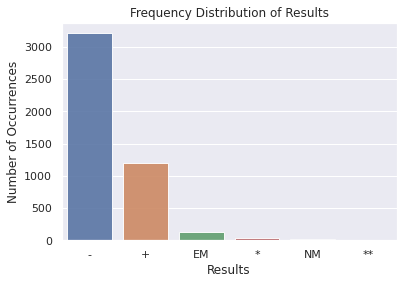

In [89]:
carrier_count = df1 ['RSV'].value_counts()

#definimos el estilo de gráfico
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
#titulo
plt.title('Frequency Distribution of Results')
#Nombres de los ejes
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Results', fontsize=12)

plt.show()

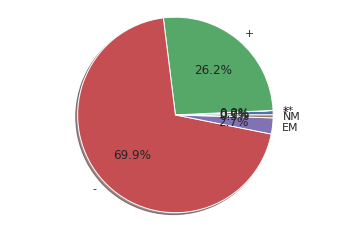

In [88]:
labels = df1 ['RSV'].astype('category').cat.categories.tolist()
counts = df1 ['RSV'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

### ¿Cómo podríamos saber si existe relación entre la infección con más de un virus?

***Tablas de contingencia***

In [58]:
df2 = df1 ['RSV'] + df1 ['AdenoV']

a = df1 ['RSV'] == '+'
b = df1 ['AdenoV'] == '+'

#comparamos los datos en una tabla de contingencia
groups = df2.groupby([a,b]).count() 
print (groups)

RSV    AdenoV
False  False     3365
       True        24
True   False     1204
       True         1
dtype: int64


In [59]:
#Test de comparación de datos cualitativos
ss.chisquare(groups, ddof=0, axis=0)

Power_divergenceResult(statistic=6527.826730518067, pvalue=0.0)

**¿Cómo podría saber si ser positivo para RSV es más probable en chicos que en grandes?**

In [60]:
pos = df1[df1['RSV'] == '+']['Edad(meses)']
neg = df1[df1['RSV'] == '-']['Edad(meses)']

In [61]:
print(pos.mean())
print(neg.mean())
print(ss.shapiro(df1['Edad(meses)']))

10.409294605809128
19.711491747119275
ShapiroResult(statistic=0.5396159887313843, pvalue=0.0)


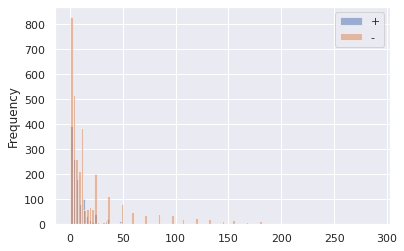

In [62]:
%matplotlib inline
plt.hist(pos, bins=100, alpha=0.5, label='+')
plt.hist(neg, bins=100, alpha=0.5, label='-')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

In [63]:
ss.kstest(pos, neg)

KstestResult(statistic=0.17135365852082637, pvalue=5.854531236812909e-23)

**Obteniendo previamente los datos del servicio meteorológico nacional:
¿podrían hacer alguna inferencia de la relación entre la temperatura ambiente y/o la radiación con la incidencia y prevalencia de cada virus?**

https://www.smn.gob.ar/descarga-de-datos

In [65]:
tabla_smn = pd.read_csv('estadisticas.txt', sep='\t', encoding ='latin1')[4:]
tabla_smn.columns = ['Estación', 'valor', '01','02','03','04',' 05','06','07','08','09','10','11','12']

In [66]:
temp_bsas = tabla_smn[(tabla_smn['Estación'].str.contains('BUENOS AIRES')) & (tabla_smn['valor'] == 'Temperatura (°C)')]

In [82]:
temperatura = []
for fecha in df1['Fecha'][:-1]:
    try:
        mes = str(fecha.split('/')[1])
        temp = temp_bsas[str(mes)][405]
        temperatura.append(temp)
    except:
        temperatura.append('NaN')
temperatura.append('NaN')
df1['temperatura'] = temperatura

<ipython-input-82-bb9f18a54e9a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['temperatura'] = temperatura


In [83]:
pos = pd.DataFrame([float(i) for i in df1[df1['RSV'] == '+']['temperatura']])
pos = pos.dropna()
neg = pd.DataFrame([float(i) for i in df1[df1['RSV'] == '-']['temperatura']])
neg = neg.dropna()

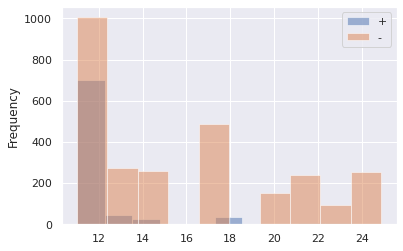

In [84]:
%matplotlib inline
plt.hist(pos[0], bins=10, alpha=0.5, label='+')
plt.hist(neg[0], bins=10, alpha=0.5, label='-')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

**¿Existe una correlación entre la prevalencia de casos positivos respecto de la temperatura promedio por mes?**

In [70]:
ss.kstest(pos[0], neg[0])

KstestResult(statistic=0.49518696305699916, pvalue=1.240117069459801e-143)

**¿Se les ocurre alguna manera de trabajar con estos datos y comparar distribuciones?**

In [71]:
#Separo los datos en dos grupos

df_pos = df1[df1['RSV'] == '+']
df_neg = df1[df1['RSV'] == '-']

In [72]:
ss.ttest_ind(df_pos['Edad(meses)'], df_neg['Edad(meses)'], axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=-8.936357760462757, pvalue=5.798603181591831e-19)

In [73]:
print ('Edades promedio de postivos = ' + str(df_pos['Edad(meses)'].mean()))
print ('Edades promedio de negativos = ' + str(df_neg['Edad(meses)'].mean()))

Edades promedio de postivos = 10.409294605809128
Edades promedio de negativos = 19.711491747119275


In [74]:
import scipy.stats

mean_pos = df_pos['Edad(meses)'].mean()
std_pos = df_pos['Edad(meses)'].std()
count_pos = df_pos['Edad(meses)'].count()
mean_neg = df_neg['Edad(meses)'].mean()
std_neg =  df_neg['Edad(meses)'].std()
count_neg = df_neg['Edad(meses)'].count()




ss.ttest_ind_from_stats(mean_pos, std_pos, count_pos, mean_neg, std_neg, count_neg, equal_var=True)

Ttest_indResult(statistic=-8.936357760462757, pvalue=5.798603181591831e-19)

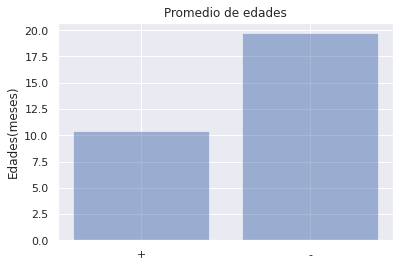

In [75]:
objects = ('+', '-')
y_pos = np.arange(len(objects))
performance = [df_pos['Edad(meses)'].mean(),df_neg['Edad(meses)'].mean()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Edades(meses)')
plt.title('Promedio de edades')

plt.show()

### **CORRELACIÓN**

In [5]:
amp_cardiap = pd.read_csv('amp_cadiap.csv')
amp_cardiap.head(2)

,Unnamed: 0,max_peaks_positions,max_peaks_intensities,min_peaks_positions,min_peaks_intensities,amplitudes,times_to_peaks,file,TTP_norm
0,0,37.0,30,18.0,13,1.307692,19,200121_analysis_result_c1a000.json,14.529412
1,1,272.0,29,253.0,13,1.230769,19,200121_analysis_result_c1a000.json,15.437499


In [6]:
df_manual = pd.read_csv("DI_manual.csv", sep=",")
df_manual.head(2)

,experimento,foto,pico,Intensidad_max,tiempo_max,Intensidad_min,tiempo_min,Amplitud,TTP,TTP_manual
0,200121,C1a000,1,43.19,125,17.89,118,1.414198,7,4.949802
1,200121,C1a000,2,42.64,360,16.80,354,1.538095,6,3.900929


In [14]:
import scipy.stats

x = amp_cardiap['amplitudes'].dropna()
y = df_manual ['Amplitud'].dropna()
scipy.stats.pearsonr(x, y)

(0.979882224642505, 2.9702132470342397e-35)

In [16]:
df = pd.DataFrame((x,y)).T
def outliers(df,column,percentiles):
    Q1 = df[column].quantile(percentiles[0])
    Q3 = df[column].quantile(percentiles[1])
    IQR = Q3 - Q1
    idx = ~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))
    df = df[idx.values]
    return df

df = outliers(df,'amplitudes',[0.02,0.98])
df = outliers(df,'Amplitud',[0.02,0.98])

Text(0, 0.5, 'Amplitud-manual')

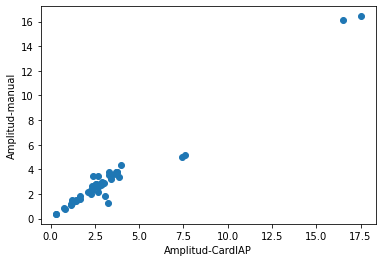

In [17]:
import matplotlib.pyplot as pp

pp.scatter(df['amplitudes'],df['Amplitud'])
pp.xlabel('Amplitud-CardIAP')
pp.ylabel('Amplitud-manual')

Text(0, 1, 'r-squared = 0.956')

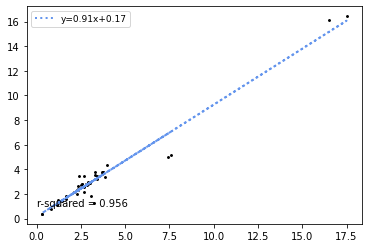

In [18]:
from scipy import stats
from sklearn.metrics import r2_score
#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
lines = plt.plot(x, line, 'cornflowerblue', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
#end
plt.setp(lines, color='cornflowerblue', linewidth=2.0,linestyle = ':')
plt.scatter(x,y, color="k", s=3.5)
plt.legend(fontsize=9)
plt.annotate("r-squared = {:.3f}".format(r2_score(x, y)), (0, 1))
# pp.savefig('/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/TTP_cadiap_1hz.png')